# Cox

In [1]:
install.packages("survminer")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘data.table’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘cmprsk’



In [40]:
library(survival);
library(survminer);

data("lung")

lung

inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
3,306,2,74,1,1,90,100,1175,NA
3,455,2,68,1,0,90,90,1225,15
3,1010,1,56,1,0,90,90,NA,15
5,210,2,57,1,1,90,60,1150,11
1,883,2,60,1,0,100,90,NA,0
12,1022,1,74,1,1,50,80,513,0
7,310,2,68,2,2,70,60,384,10
11,361,2,71,2,2,60,80,538,1
1,218,2,53,1,1,70,80,825,16
7,166,2,61,1,2,70,70,271,34


In [45]:
res_cox = coxph(Surv(time, status) ~ sex + age, data = lung)
summary(res_cox)

Call:
coxph(formula = Surv(time, status) ~ sex + age, data = lung)

  n= 228, number of events= 165 

         coef exp(coef)  se(coef)      z Pr(>|z|)   
sex -0.513219  0.598566  0.167458 -3.065  0.00218 **
age  0.017045  1.017191  0.009223  1.848  0.06459 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    exp(coef) exp(-coef) lower .95 upper .95
sex    0.5986     1.6707    0.4311    0.8311
age    1.0172     0.9831    0.9990    1.0357

Concordance= 0.603  (se = 0.026 )
Rsquare= 0.06   (max possible= 0.999 )
Likelihood ratio test= 14.12  on 2 df,   p=0.0008574
Wald test            = 13.47  on 2 df,   p=0.001187
Score (logrank) test = 13.72  on 2 df,   p=0.001048


In [46]:
new_df = with(lung,
              data.frame(sex = c(1, 2), 
                         age = rep(mean(age, na.rm = TRUE), 2),
                         wt.loss = rep(mean(wt.loss, na.rm = TRUE), 2)
                        )
             )
new_df

sex,age,wt.loss
1,62.44737,9.831776
2,62.44737,9.831776


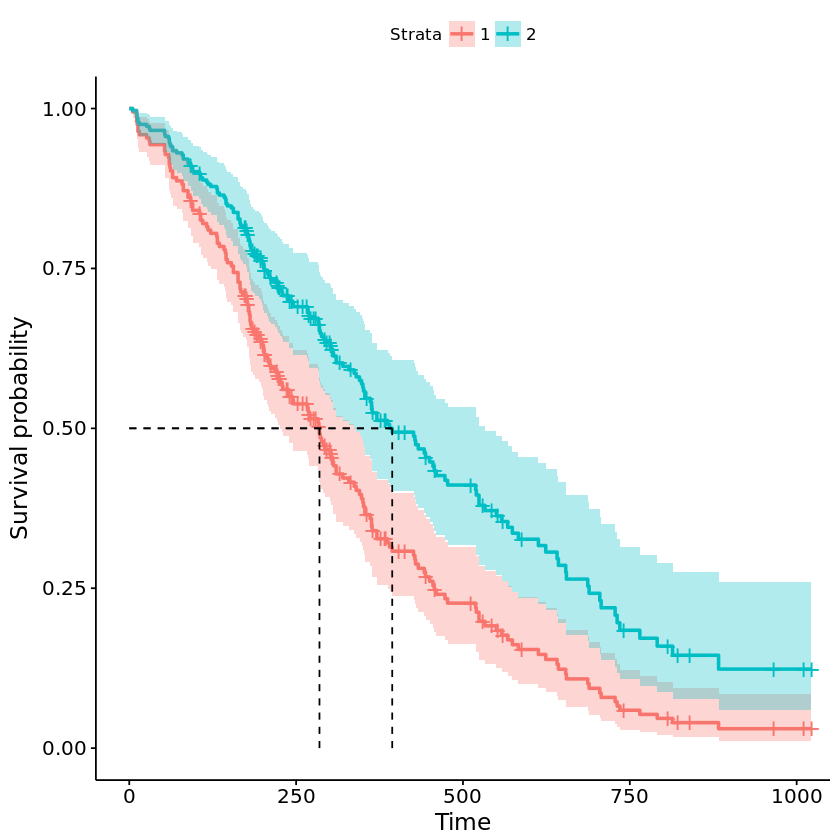

In [47]:
ggsurvplot(survfit(res_cox, newdata = new_df), data = new_df, conf.int = TRUE, censor = TRUE, surv.median.line = "hv")

# Tobit

In [5]:
install.packages("VGAM")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [11]:
library(VGAM);

data("mtcars")

tobit = VGAM::vglm(mpg ~ cyl +disp + hp + gear, VGAM::tobit(Upper = 34), data = mtcars)
VGAM::summary(tobit)


Call:
VGAM::vglm(formula = mpg ~ cyl + disp + hp + gear, family = VGAM::tobit(Upper = 34), 
    data = mtcars)


Pearson residuals:
             Min      1Q Median     3Q   Max
mu       -1.5683 -0.8366 -0.297 0.4720 2.540
loge(sd) -0.7043 -0.5603 -0.253 0.1343 3.869

Coefficients: 
              Estimate Std. Error z value Pr(>|z|)    
(Intercept):1 27.42342    5.78803   4.738 2.16e-06 ***
(Intercept):2  1.02514    0.12511   8.194 2.53e-16 ***
cyl           -0.86624    0.78024  -1.110   0.2669    
disp          -0.01190    0.01093  -1.089   0.2761    
hp            -0.03050    0.01821  -1.675   0.0939 .  
gear           1.42306    1.11198   1.280   0.2006    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Number of linear predictors:  2 

Names of linear predictors: mu, loge(sd)

Log-likelihood: -78.2105 on 58 degrees of freedom

Number of iterations: 5 

# Heckman

In [7]:
install.packages("sampleSelection")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lme4’, ‘SparseM’, ‘MatrixModels’, ‘pbkrtest’, ‘quantreg’, ‘sandwich’, ‘car’, ‘lmtest’, ‘maxLik’, ‘miscTools’, ‘systemfit’, ‘Formula’



In [9]:
library(sampleSelection);

data("Mroz87")

heckman = heckit(lfp ~ age + I(age^2) + kids5 + huswage + educ, log(wage) ~ educ + exper + I(exper^2) + city, data = Mroz87)
summary(heckman)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.6204198881,1.5164451995,-0.40912780,6.825643e-01
age,0.0100365481,0.0689931183,0.14547173,8.843781e-01
I(age^2),-0.0004891427,0.0007841401,-0.62379500,5.329545e-01
kids5,-0.8546564102,0.1153681957,-7.40807642,3.501843e-13
huswage,-0.0421711035,0.0124157804,-3.39657293,7.188057e-04
educ,0.1476737404,0.0234280139,6.30329746,5.004215e-10
(Intercept),-0.5471531194,0.2890637948,-1.89284556,5.876839e-02
educ,0.1064520958,0.0171744578,6.19827986,9.478180e-10
exper,0.0411568989,0.0131804681,3.12256732,1.862631e-03
I(exper^2),-0.0008013972,0.0003949725,-2.02899490,4.281632e-02
